<a href="https://colab.research.google.com/github/zfornier/atom/blob/master/TP2%20SD%20TSIA%20210%20exo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>MNIST classification using Keras<center></h1>

## Zoé Fornier

# Importing Keras

In [0]:
# Importing the Keras main module forcing tensorflow 1.x backend
import tensorflow as tf
import keras
import numpy as np
print("Using tensorflow version " + str(tf.__version__))
print("Using keras version " + str(keras.__version__))

Using tensorflow version 1.15.0
Using keras version 2.2.5


Using TensorFlow backend.


## Loading and preparing the MNIST dataset

Load the MNIST dataset via keras.datasets. Again, turn train and test labels into one-hot encoding, and reshape and normalize data as in the first exercise. 

In [0]:
#@title
# The MNSIT dataset is ready to be imported from Keras into RAM
# Warning: you cannot do that for larger databases (e.g., ImageNet)
from keras.datasets import mnist
# START CODE HERE
(train_images, y_train), (test_images, y_test) = mnist.load_data()

# END CODE HERE


11493376/11490434 [==============================] - 2s 0us/step


In [0]:
from keras.utils.np_utils import to_categorical
# START CODE HERE
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)
# END CODE HERE

In [0]:
# Reshape to proper images with 1 color channel according to backend scheme
img_rows, img_cols = train_images.shape[1], train_images.shape[2]
img_rows2, img_cols2 = test_images.shape[1], test_images.shape[2]

# START CODE HERE
train_images_reshaped = train_images.reshape((train_images.shape[0],img_rows*img_cols,))
test_images_reshaped = test_images.reshape((test_images.shape[0],img_rows2*img_cols2,))
# END CODE HERE

# Cast pixels from uint8 to float32
train_images_cast = train_images_reshaped.astype('float32')
test_images_cast = test_images_reshaped.astype('float32')

# Now let us normalize the images so that they have zero mean and standard deviation
# Hint: are real testing data statistics known at training time ?
# START CODE HERE
mean=np.mean(train_images_cast)
var=np.var(train_images_cast)
x_train = (train_images_cast - mean)/np.sqrt(var)
x_test = (test_images_cast - mean)/np.sqrt(var)
# END CODE HERE

## Defining the neural network architecture (i.e., the network model)

Look at this [cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Keras_Cheat_Sheet_Python.pdf) for some basic information on how to use numpy.

First, try to replicate the classifier of the first exercise. Secondly, create a fully connected network.
For the fully connected layer, you can for example use this architecture: 
$$ (784) \rightarrow (300) \rightarrow (10) $$
For this first implementation of the network, use only sigmoid activations in the hidden layer. Remember to use the right output activation function ! 

In [0]:
# The Sequential module is a container for more complex NN elements and
# defines a loop-less NN architecture
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

# START CODE HERE

model = Sequential()
model.add(Dense(300,activation="sigmoid",input_dim=(784)))
model.add(Dense(10,activation='softmax',input_dim=(300)))

# END CODE HERE

Instantiate a SGD optimizer with a tentative learning rate of $\\eta = 10^{-2}$ and, using the appropriate loss function (which is called, in keras, ```'categorical_crossentropy'```) and compile the model.

In [0]:
# The optimizers module provides a number of optimization algorithms for updating
# a netwok parameters accoridng to the computed error gradints
from keras import optimizers

# START CODE HERE
opt = optimizers.SGD(lr=0.01)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

# END CODE HERE
# We can now have a look at the defined model topology
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


## Training the network

Train the model for 10 epochs using the ```.fit()``` method, validating the model at each epoch and keeping track of the training history for later plotting. Make sure you enable ```.fit()``` verbose mode in order to visualize the training.

In order to accelerate training, use the ```batch_size``` option of ```.fit()```, which will process a batch of examples at the same time, and make one update for all of them, averaged over the gradients for each training example of the batch. You can begin with a small size, and experiment with a larger size later.

In [0]:
# This is where the actual training-testing happens
# Number of epochs we want to train
epochs = 10

# START CODE HERE
history=model.fit(x_train,y_train,batch_size=None, epochs=10,verbose=2,validation_data=(x_test,y_test))
# END CODE HERE

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





 - 14s - loss: 0.7051 - acc: 0.8295 - val_loss: 0.4042 - val_acc: 0.8948
Epoch 2/10
 - 7s - loss: 0.3764 - acc: 0.8961 - val_loss: 0.3283 - val_acc: 0.9096
Epoch 3/10
 - 7s - loss: 0.3255 - acc: 0.9073 - val_loss: 0.2968 - val_acc: 0.9171
Epoch 4/10
 - 7s - loss: 0.2979 - acc: 0.9142 - val_loss: 0.2765 - val_acc: 0.9212
Epoch 5/10
 - 7s - loss: 0.2781 - acc: 0.9207 - val_loss: 0.2617 - val_acc: 0.9268
Epoch 6/10
 - 7s - loss: 0.2619 - acc: 0.9259 - val_loss: 0.2490 - val_acc: 0.9298
Epoch 7/10
 - 7s - loss: 0.2480 - acc: 0.9292 - val_loss: 0.2351 - val_acc: 0.9326
Epoch 8/10
 - 7s - loss: 0.2354 - acc: 0.9331 - val_loss: 0.2263 - val_acc: 0.9369
Epoch 9/10
 - 7s - loss: 0.2240 - acc: 0.9363 - val_loss: 0.2151 - val_acc: 0.9382
Epoch 10/10
 - 7s - loss: 0.2134 - acc: 0.9394 - val_loss: 0.2062 - val_acc: 0.9419


In [0]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


## Visualizing the network performance

Visualize the training history using the ```pyplot``` package:
- In one graph, plot the train and vaidation loss functions,
- In another graph, the train and validation accuracy.
By comparing the training the testing curves, what can we conclude about the quality of the training ?

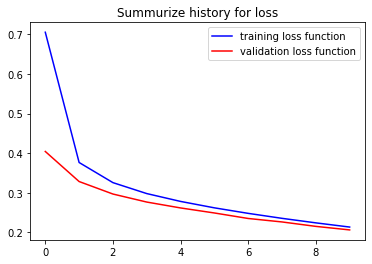

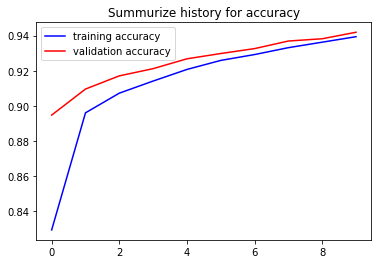

In [0]:
# We now want to plot the train and validation loss functions and accuracy curves
#print(history.history.keys())

# summarize history for loss
# START CODE HERE
import matplotlib.pyplot as plt

plt.plot(np.arange(epochs),history.history['loss'],label='training loss function',color="blue")
plt.plot(np.arange(epochs),history.history['val_loss'],label='validation loss function',color="red")
plt.legend()
plt.title("Summurize history for loss")
# END CODE HERE
plt.show()

# summarize history for accuracy
# START CODE HERE
plt.plot(np.arange(epochs),history.history['acc'],label='training accuracy',color="blue")
plt.plot(np.arange(epochs),history.history['val_acc'],label='validation accuracy',color="red")
plt.legend()
plt.title("Summurize history for accuracy")
# END CODE HERE
plt.show()


## Experiments

Note down the performance of the larger network in terms of training and validation accuracy as a reference (save the loss/accuracy graphs of the network).

Then, experiment as follow and compare performance with the reference scenario:

*  Experiment increasing the size of the batch and compare the performance with reference.
*  Experiment replacing the sigmoid activations with Relus and note what happens.
*  Experiment with a larger architecture, for example: 
$$ (784) \rightarrow (300) \rightarrow (128) \rightarrow (84) \rightarrow (10) $$

### Experiments with increasing the size of the batch

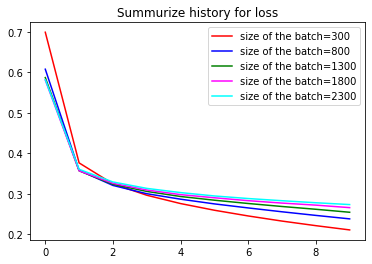

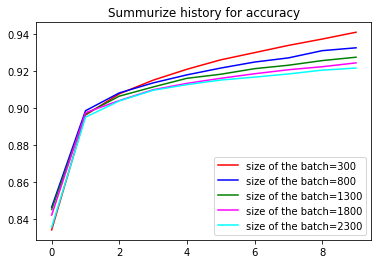

In [0]:

models = []
histories=[]
for i in range(5):

  #Defining Architecture 
  mod=Sequential()
  mod.add(Dense(300 + 1000*i,activation="sigmoid",input_dim=(784)))
  mod.add(Dense(10, activation='softmax',input_dim=(300 + 1000*i)))

  opt = optimizers.SGD(lr=0.01)
  mod.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
  
  #Training
  hist=mod.fit(x_train,y_train,batch_size=None, epochs=10,verbose=0,validation_data=(x_test,y_test))

  models.append(mod)
  histories.append(hist)


#Visualize loss function
plt.plot(np.arange(epochs),histories[0].history['loss'],label='size of the batch=300',color="red")
plt.plot(np.arange(epochs),histories[1].history['loss'],label='size of the batch=800',color="blue")
plt.plot(np.arange(epochs),histories[2].history['loss'],label='size of the batch=1300',color="green")
plt.plot(np.arange(epochs),histories[3].history['loss'],label='size of the batch=1800',color="magenta")
plt.plot(np.arange(epochs),histories[4].history['loss'],label='size of the batch=2300',color="cyan")
plt.legend()
plt.title("Summurize history for loss")
plt.show()

#Visualize accuracy function
plt.plot(np.arange(epochs),histories[0].history['acc'],label='size of the batch=300',color="red")
plt.plot(np.arange(epochs),histories[1].history['acc'],label='size of the batch=800',color="blue")
plt.plot(np.arange(epochs),histories[2].history['acc'],label='size of the batch=1300',color="green")
plt.plot(np.arange(epochs),histories[3].history['acc'],label='size of the batch=1800',color="magenta")
plt.plot(np.arange(epochs),histories[4].history['acc'],label='size of the batch=2300',color="cyan")
plt.legend()
plt.title("Summurize history for accuracy")
plt.show()


### Experiments with replacing the sigmoid function with the relus function

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 144us/step - loss: 0.3469 - acc: 0.9017 - val_loss: 0.2147 - val_acc: 0.9378
Epoch 2/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.1904 - acc: 0.9466 - val_loss: 0.1667 - val_acc: 0.9511
Epoch 3/10
60000/60000 [==============================] - 8s 131us/step - loss: 0.1470 - acc: 0.9585 - val_loss: 0.1402 - val_acc: 0.9588
Epoch 4/10
60000/60000 [==============================] - 8s 130us/step - loss: 0.1209 - acc: 0.9662 - val_loss: 0.1234 - val_acc: 0.9638
Epoch 5/10
60000/60000 [==============================] - 8s 130us/step - loss: 0.1030 - acc: 0.9709 - val_loss: 0.1128 - val_acc: 0.9648
Epoch 6/10
60000/60000 [==============================] - 8s 131us/step - loss: 0.0898 - acc: 0.9751 - val_loss: 0.1037 - val_acc: 0.9689
Epoch 7/10
60000/60000 [==============================] - 8s 130us/step - loss: 0.0790 - acc: 0.9783 - val_loss: 0.0952 - 

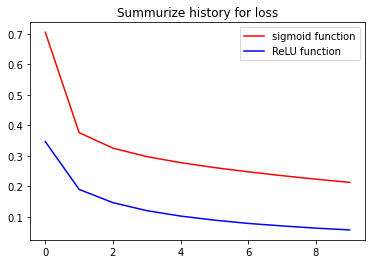

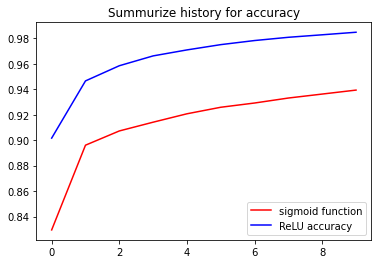

In [0]:
#Model implementation and training
model2=Sequential()
model2.add(Dense(300,activation="relu",input_dim=(784)))
model2.add(Dense(10, activation='softmax',input_dim=(300)))

opt2 = optimizers.SGD(lr=0.01)
model2.compile(optimizer=opt2,loss='categorical_crossentropy',metrics=['accuracy'])
history2=model2.fit(x_train,y_train,batch_size=None, epochs=10,verbose=1,validation_data=(x_test,y_test))


#Visualize loss function
plt.plot(np.arange(epochs),history.history['loss'],label='sigmoid function',color="red")
plt.plot(np.arange(epochs),history2.history['loss'],label='ReLU function',color="blue")
plt.legend()
plt.title("Summurize history for loss")
plt.show()

#Visualize accuracy function
plt.plot(np.arange(epochs),history.history['acc'],label='sigmoid function',color="red")
plt.plot(np.arange(epochs),history2.history['acc'],label='ReLU accuracy',color="blue")
plt.legend()
plt.title("Summurize history for accuracy")
plt.show()


### Experiments with a larger architecture: (784)→(300)→(128)→(84)→(10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 161us/step - loss: 2.2139 - acc: 0.3136 - val_loss: 2.0494 - val_acc: 0.5689
Epoch 2/10
60000/60000 [==============================] - 9s 151us/step - loss: 1.6444 - acc: 0.5774 - val_loss: 1.2301 - val_acc: 0.6970
Epoch 3/10
60000/60000 [==============================] - 9s 150us/step - loss: 0.9952 - acc: 0.7365 - val_loss: 0.8066 - val_acc: 0.7904
Epoch 4/10
60000/60000 [==============================] - 9s 151us/step - loss: 0.6950 - acc: 0.8203 - val_loss: 0.5857 - val_acc: 0.8499
Epoch 5/10
60000/60000 [==============================] - 9s 150us/step - loss: 0.5318 - acc: 0.8612 - val_loss: 0.4679 - val_acc: 0.8777
Epoch 6/10
60000/60000 [==============================] - 9s 151us/step - loss: 0.4447 - acc: 0.8805 - val_loss: 0.4039 - val_acc: 0.8890
Epoch 7/10
60000/60000 [==============================] - 9s 151us/step - loss: 0.3946 - acc: 0.8917 - val_loss: 0.3647 -

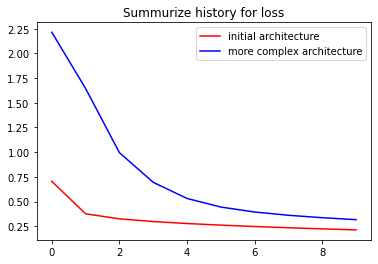

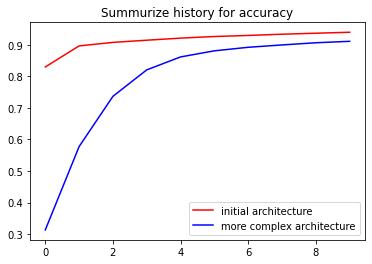

In [0]:
#Model Architecture

model3=Sequential()
model3.add(Dense(300,activation="sigmoid",input_dim=(784)))
model3.add(Dense(128,activation="sigmoid",input_dim=(300)))
model3.add(Dense(84,activation="sigmoid",input_dim=(128)))
model3.add(Dense(10, activation='softmax',input_dim=(84)))

opt3 = optimizers.SGD(lr=0.01)
model3.compile(optimizer=opt3,loss='categorical_crossentropy',metrics=['accuracy'])

#Training
history3=model3.fit(x_train,y_train,batch_size=None, epochs=10,verbose=1,validation_data=(x_test,y_test))

#Visualize loss function
plt.plot(np.arange(epochs),history.history['loss'],label='initial architecture',color="red")
plt.plot(np.arange(epochs),history3.history['loss'],label='more complex architecture',color="blue")
plt.legend()
plt.title("Summurize history for loss")
plt.show()

#Visualize accuracy function
plt.plot(np.arange(epochs),history.history['acc'],label='initial architecture',color="red")
plt.plot(np.arange(epochs),history3.history['acc'],label='more complex architecture',color="blue")
plt.legend()
plt.title("Summurize history for accuracy")
plt.show()

Finally, we can interpret those results. Clearly, the minimal size of the batch (300) gave the best results on 10 epochs, but we can observe that on the first epochs the results were better for larger batch. The ReLU function gives definitely better results than the sigmoid one. Finally, results are way better (at least on the first 10 epochs) with a simplier architecture.